In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

## 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [106]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [34]:
display(Math(r'A=\dfrac{M[XY]-M[X]M[Y]}{D[X]}'))
display(Math(r'B=M[Y]-A*M[X]'))
display(Math(r'y = B + A*x'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [35]:
A = (np.mean(zp*ks) - np.mean(zp)*np.mean(ks))/(np.std(zp))**2
A

2.620538882402764

In [36]:
B = np.mean(ks)-A*np.mean(zp)
B

444.1773573243597

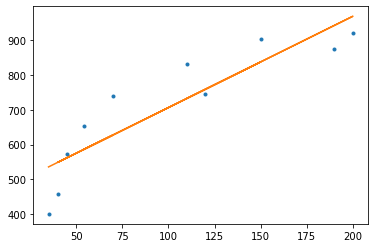

In [37]:
plt.figure("check", clear=True)
plt.plot(zp, ks, '.')
plt.plot(zp, B + A * zp)

In [108]:
zp = np.vstack([np.ones((1, 10)), zp])
zp

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [109]:
np.linalg.inv(zp.dot(zp.T)).dot(zp).dot(ks.T)

array([444.17735732,   2.62053888])

**без intercept**

In [129]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]).reshape(10,1)
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [130]:
np.linalg.inv((zp.T).dot(zp)).dot(zp.T).dot(ks)

array([5.88982042])

## 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept)

In [64]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-6
A1 = 0.1

In [65]:
def mse(X, Y, A1):
    return np.sum((Y - (A1*X))**2)/len(X)

In [66]:
mse(zp, ks, A1)

518336.326

In [67]:
n = len(zp)
for i in range(1000):
    A1 -= alpha*2/n*np.sum(zp*(A1*zp-ks))
    if (i%100==0):
        print(f"i: {i}, A1: {A1}, mse: {mse(zp, ks, A1)}")

i: 0, A1: 0.25952808, mse: 493237.7212546963
i: 100, A1: 5.54537842245223, mse: 58151.31823171113
i: 200, A1: 5.868748638669329, mse: 56522.97550129376
i: 300, A1: 5.888531320728348, mse: 56516.88130936019
i: 400, A1: 5.8897415574471985, mse: 56516.85850140053
i: 500, A1: 5.889815595583751, mse: 56516.858416040064
i: 600, A1: 5.889820124983314, mse: 56516.85841572062
i: 700, A1: 5.889820402076462, mse: 56516.85841571941
i: 800, A1: 5.88982041902807, mse: 56516.8584157194
i: 900, A1: 5.889820420065112, mse: 56516.85841571941


## 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [141]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 7e-5
A1 = 2.8
B1 = 400
def mse(X, Y, A1, B1):
    return np.sum((Y - (A1*X + B1))**2)/len(X)
n = len(zp)
for i in range(60000):
    A1 -= alpha*2/n*np.sum(zp*(A1*zp+B1-ks))
    B1 -= alpha*2/n*np.sum(A1*zp+B1-ks)
    if (i%4000==0):
        print(f"i: {i}, A1: {A1}, B1: {B1}, mse: {mse(zp, ks, A1, B1)}")

i: 0, A1: 3.0810107999999996, B1: 399.9996479706832, mse: 7217.718966478186
i: 4000, A1: 2.9026376912232794, B1: 405.85101721166546, mse: 6843.024705140111
i: 8000, A1: 2.865278626171586, B1: 410.9266722257724, mse: 6750.868170442984
i: 12000, A1: 2.8328671174295987, B1: 415.33014529538536, mse: 6681.504409425211
i: 16000, A1: 2.8047479474910855, B1: 419.1504551905462, mse: 6629.296160077027
i: 20000, A1: 2.7803526709760478, B1: 422.46483169843646, mse: 6590.000405925202
i: 24000, A1: 2.759188123176561, B1: 425.34027686846764, mse: 6560.4235418540875
i: 28000, A1: 2.740826450445326, B1: 427.8349194976858, mse: 6538.161826634122
i: 32000, A1: 2.7248964608852764, B1: 429.999190238221, mse: 6521.406028475698
i: 36000, A1: 2.7110761204894263, B1: 431.87684108226136, mse: 6508.794386957905
i: 40000, A1: 2.6990860430359906, B1: 433.50582983403683, mse: 6499.301941401462
i: 44000, A1: 2.6886838421334347, B1: 434.9190874489089, mse: 6492.157231292559
i: 48000, A1: 2.6796592312385257, B1: 436.1